In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/kondu/Downloads/day2/day2_updated_mental_health.csv")

# Quick preview
df.head()


,EmployeeID,Age,YearsAtCompany,WorkHoursPerWeek,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,...,Department_Sales,Department_Support,RemoteWork_No,RemoteWork_Yes,HasMentalHealthSupport_Yes,HasTherapyAccess_Yes,SalaryRange_40K-60K,SalaryRange_60K-80K,SalaryRange_80K-100K,SalaryRange_<40K
0,0.000000,0.756757,0.70,0.586207,0.263333,0.451111,0.941111,0.351111,0.60,0.79,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.000333,0.378378,0.05,1.000000,0.710000,0.111111,0.516667,0.304444,0.64,0.90,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.000667,0.189189,0.65,1.000000,0.677778,0.685556,0.522222,0.866667,0.24,0.97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.001000,0.540541,0.75,0.034483,0.353333,0.306667,0.600000,0.410000,0.94,0.58,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
4,0.001334,0.486486,0.30,0.137931,0.808889,0.148889,0.267778,0.124444,0.04,0.33,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


In [17]:
X = df.drop("BurnoutRisk", axis=1)
y = df["BurnoutRisk"]


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]


In [24]:
lda_model = LDA()
lda_model.fit(X_train, y_train)

y_pred_lda = lda_model.predict(X_test)
y_prob_lda = lda_model.predict_proba(X_test)[:, 1]



In [25]:
print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, y_prob_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


🔹 Logistic Regression
Accuracy: 0.985
ROC AUC: 0.9994887716804449
[[393   6]
 [  3 198]]
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       399
         1.0       0.97      0.99      0.98       201

    accuracy                           0.98       600
   macro avg       0.98      0.99      0.98       600
weighted avg       0.99      0.98      0.99       600



In [26]:
print("🔹 LDA")
print("Accuracy:", accuracy_score(y_test, y_pred_lda))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lda))
print(confusion_matrix(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))


🔹 LDA
Accuracy: 0.9466666666666667
ROC AUC: 0.998965074377486
[[367  32]
 [  0 201]]
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96       399
         1.0       0.86      1.00      0.93       201

    accuracy                           0.95       600
   macro avg       0.93      0.96      0.94       600
weighted avg       0.95      0.95      0.95       600



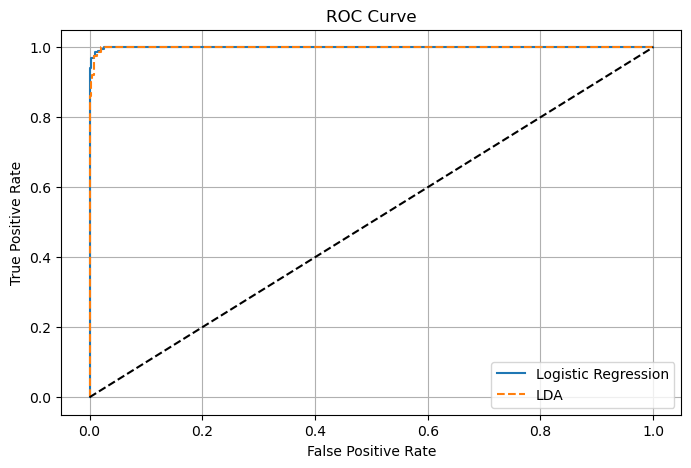

In [27]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda)

plt.figure(figsize=(8, 5))
plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot(fpr_lda, tpr_lda, label="LDA", linestyle='--')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()
